<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()

## Load the dataframe


Load the data


In [5]:
import requests
import io

# Define the URL
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the data from the URL
resp1 = requests.get(URL1)
text1 = resp1.text
# Check if the request was successful
if resp1.status_code == 200:
    # Use io.StringIO to read the CSV data
    data = pd.read_csv(io.StringIO(text1))
    print('Successful')
else:
    print(f"Failed to fetch data. Status code: {resp1.status_code}")

Successful


In [7]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [9]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp2 = requests.get(URL2)
text2 = resp2.text
if resp2.status_code == 200:
    X = pd.read_csv(io.StringIO(text2))
    print('Successful')
else:
    print(f"Failed to fetch data. Status code: {resp2.status_code}")

Successful


In [11]:
X.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [13]:
df = pd.DataFrame(data)

# Access the column 'Class' and convert it to a NumPy array
Y = df['Class'].to_numpy()
# Drop the 'Class' column from X
X = X.drop(columns=['Class'])
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [31]:
from sklearn.preprocessing import StandardScaler

# Separate numeric columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(exclude=['float64', 'int64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numeric columns
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
XN = X[numeric_columns]

# Display the standardized DataFrame
print(XN.head())

   FlightNumber   PayloadMass   Flights     Block  ReusedCount  Longitude  \
0     -1.712912 -3.321533e-17 -0.653913 -1.575895     -0.97344   0.411430   
1     -1.674419 -1.195232e+00 -0.653913 -1.575895     -0.97344   0.411430   
2     -1.635927 -1.162673e+00 -0.653913 -1.575895     -0.97344   0.411430   
3     -1.597434 -1.200587e+00 -0.653913 -1.575895     -0.97344  -2.433736   
4     -1.558942 -6.286706e-01 -0.653913 -1.575895     -0.97344   0.411430   

   Latitude  
0 -0.417073  
1 -0.417073  
2 -0.417073  
3  2.433637  
4 -0.417073  


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [33]:
XN_train, XN_test, Y_train, Y_test = train_test_split(XN, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [35]:
XN_train.shape

(72, 7)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [37]:
lr=LogisticRegression()
# Create GridSearchCV object with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the GridSearchCV object to the training data
logreg_cv.fit(XN_train, Y_train)

# Display the best parameters and best score
print("Best parameters found: ", logreg_cv.best_params_)
print("Best cross-validation score: ", logreg_cv.best_score_)

Best parameters found:  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation score:  0.7446428571428572


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [39]:
accuracy = logreg_cv.score(XN_test, Y_test)
accuracy

0.8333333333333334

Lets look at the confusion matrix:


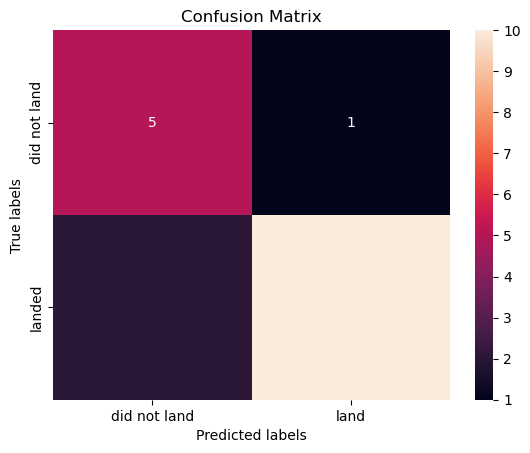

In [41]:
yhat=logreg_cv.predict(XN_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [43]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [45]:
# Create GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Fit the GridSearchCV object to the training data
svm_cv.fit(XN_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [46]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8321428571428571


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [51]:
# Predict the labels for test data
Y_pred = svm_cv.predict(XN_test)

# Calculate the accuracy score
accuracy = svm_cv.score(XN_test, Y_test)

print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.7777777777777778


We can plot the confusion matrix


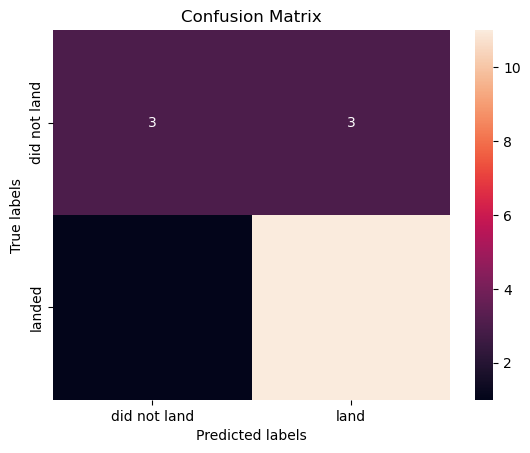

In [53]:
yhat=svm_cv.predict(XN_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [69]:
# Define corrected parameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']  # Corrected max_features options
}
tree = DecisionTreeClassifier()

In [71]:
# Create GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters, cv=10, error_score='raise')

# Fit the GridSearchCV object to the training data
tree_cv.fit(XN_train, Y_train)

GridSearchCV(cv=10, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [61]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8446428571428571


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [75]:
# Calculate accuracy on the test data
accuracy = tree_cv.score(XN_test, Y_test)

# Print the accuracy score
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.7777777777777778


We can plot the confusion matrix


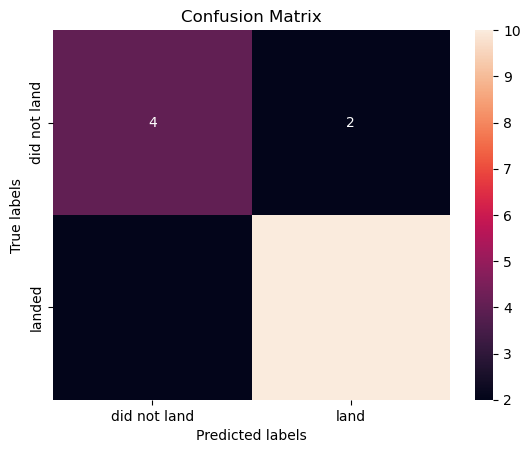

In [77]:
yhat = tree_cv.predict(XN_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [79]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [81]:
# Create GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters, cv=10, error_score='raise')

# Fit the GridSearchCV object to the training data
knn_cv.fit(XN_train, Y_train)

GridSearchCV(cv=10, error_score='raise', estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [83]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
accuracy : 0.7785714285714286


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [85]:
# Calculate accuracy on the test data
accuracy = knn_cv.score(XN_test, Y_test)

# Print the accuracy score
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.7222222222222222


We can plot the confusion matrix


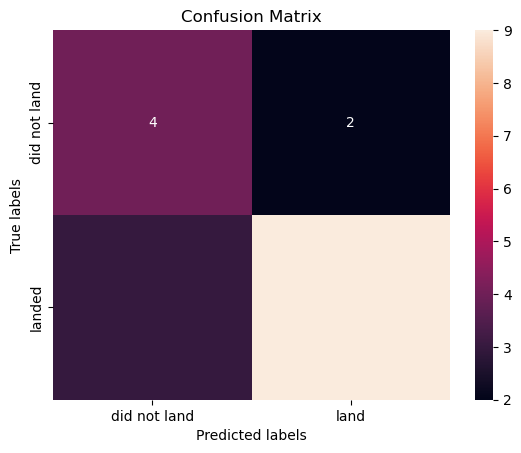

In [89]:
yhat = knn_cv.predict(XN_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [91]:
accuracy_tree = tree_cv.score(XN_test, Y_test)
accuracy_knn = knn_cv.score(XN_test, Y_test)

# Compare and print the best performing model
if accuracy_tree > accuracy_knn:
    print("Decision Tree Classifier performs better.")
elif accuracy_knn > accuracy_tree:
    print("K-Nearest Neighbors Classifier performs better.")
else:
    print("Both classifiers perform equally well.")


Decision Tree Classifier performs better.


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
